In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Load Dataset
movies=pd.read_csv('movies.csv')
ratings=pd.read_csv('ratings.csv')

D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\software\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


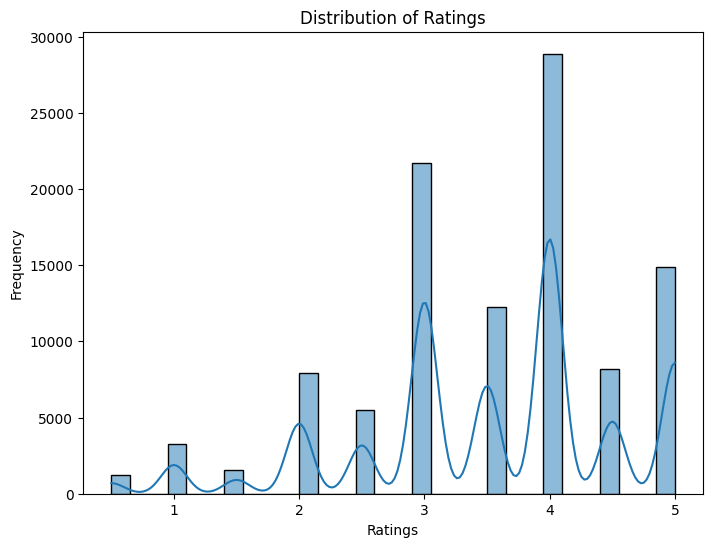

In [3]:
# Understanding distribution of ratings
ratings = ratings['rating']
plt.figure(figsize=(8, 6))
sns.histplot(ratings, bins=30, kde=True)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


In [6]:
# Finding unique users and movies
unique_users = set(ratings['userId'])
unique_movies = set(movies['title'])
unique_users
unique_movies
print(f'Unique Users: {len(unique_users)}')
print(f'Unique Movies: {len(unique_movies)}')

Unique Users: 668
Unique Movies: 10327


In [7]:
movies=movies.merge(ratings,on='movieId')
movies

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286
...,...,...,...,...,...,...
105334,148238,A Very Murray Christmas (2015),Comedy,475,3.0,1451213043
105335,148626,The Big Short (2015),Drama,458,4.0,1452014749
105336,148626,The Big Short (2015),Drama,576,4.5,1451687664
105337,148626,The Big Short (2015),Drama,668,4.5,1451148148


D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\software\lib\site-package

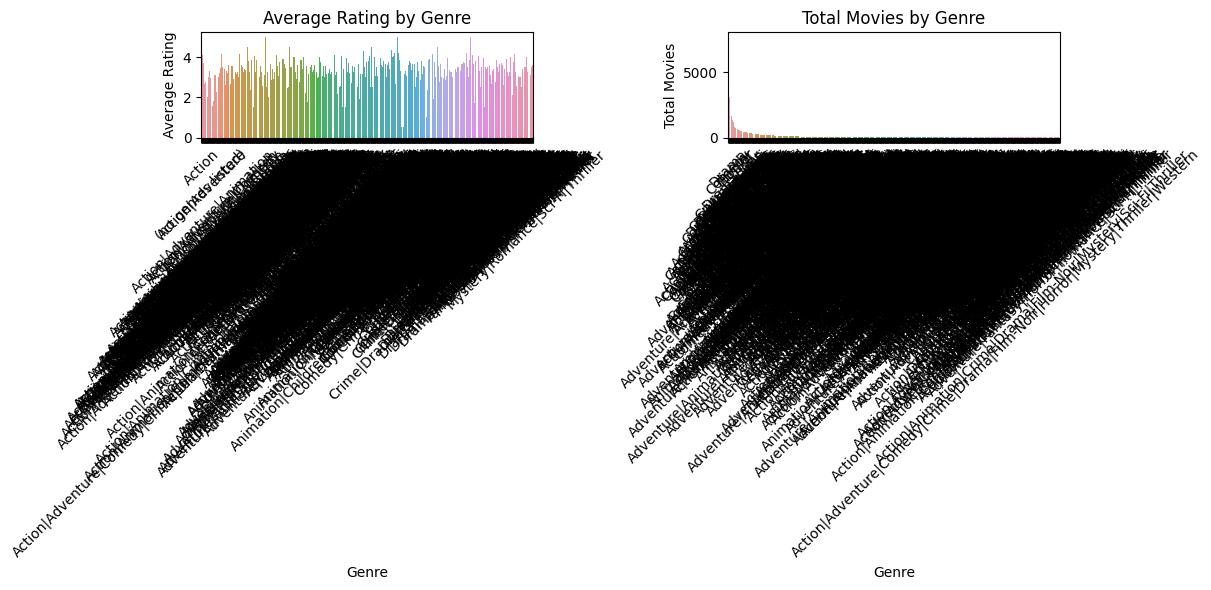

In [8]:

# Average rating at genre level
avg_ratings_by_genre = movies.groupby('genres')['rating'].mean()

# Total movies at genre level
total_movies_by_genre = movies['genres'].value_counts()

# Plotting average ratings and total movies by genre
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=avg_ratings_by_genre.index, y=avg_ratings_by_genre.values)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=total_movies_by_genre.index, y=total_movies_by_genre.values)
plt.xlabel('Genre')
plt.ylabel('Total Movies')
plt.title('Total Movies by Genre')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
#Unique genres considered
unique_genres = set(movies['genres'])
print(f'Unique Genres: {unique_genres}')


Unique Genres: {'Animation|Children|Comedy|Romance', 'Adventure|Animation|Children|Comedy|Fantasy|Romance', 'Comedy|Drama|Sci-Fi', 'Action|Adventure|Mystery|Romance|Thriller', 'Action|Romance|Western', 'Action|Crime', 'Children|Comedy|Musical|Romance', 'Adventure|Animation|Children|Fantasy|IMAX', 'Drama|Romance|Western', 'Adventure|Children|Fantasy|Sci-Fi', 'Action|Drama|Sci-Fi', 'Adventure|Comedy|Fantasy|Sci-Fi', 'Animation|Children|Comedy|Musical|Western', 'Action|Adventure|Comedy|Crime', 'Children|Drama|War', 'Adventure|Children|Drama|Fantasy', 'Adventure|Children|Comedy|Musical', 'Comedy|Horror|Sci-Fi|Thriller', 'Action|Drama|Western', 'Adventure|Western', 'Drama|Romance', 'Drama|Film-Noir', 'Drama|Fantasy|Mystery|Sci-Fi', 'Animation|Drama|Mystery|Sci-Fi|Thriller', 'Adventure|Drama|Film-Noir|Thriller', 'Comedy|Drama|Thriller', 'Comedy|Drama|Musical|Romance', 'War', 'Action|Adventure|Drama|Fantasy|Thriller', 'Action|Adventure|Drama|Sci-Fi|Thriller', 'Action|Adventure|Comedy|Drama|Ro

In [10]:
import pandas as pd
import tkinter as tk
from tkinter import ttk

# Convert the movie data to a DataFrame
df = pd.DataFrame(movies)

def popularity_recommender(genre, min_rating, num_recommendations):
    # Filter movies by genre and minimum rating threshold
    genre_movies = df[(df['genres'] == genre) & (df['rating'] >= min_rating)]

    # Sort movies by rating in descending order
    genre_movies = genre_movies.sort_values(by='rating', ascending=False)

    # Select the top N movies
    recommendations = genre_movies.head(num_recommendations)

    return recommendations[['title', 'rating']]

def on_button_click():
    genre = genre_var.get()
    min_rating = min_rating_var.get()
    num_recommendations = num_recommendations_var.get()

    recommended_movies = popularity_recommender(genre, min_rating, num_recommendations)

    result_text.config(state=tk.NORMAL)
    result_text.delete(1.0, tk.END)
    result_text.insert(tk.END, f"Top {num_recommendations} recommended movies in the {genre} genre:\n")
    result_text.insert(tk.END, recommended_movies.to_string(index=False))
    result_text.config(state=tk.DISABLED)

# Create Tkinter window
root = tk.Tk()
root.title("Movie Recommender")

# Create and set up widgets
genre_label = ttk.Label(root, text="Enter Genre:")
genre_var = tk.StringVar()
genre_entry = ttk.Entry(root, textvariable=genre_var)

min_rating_label = ttk.Label(root, text="Min Rating:")
min_rating_var = tk.DoubleVar()
min_rating_slider = ttk.Scale(root, variable=min_rating_var, from_=0.0, to=5.0, orient="horizontal", length=200)

num_recommendations_label = ttk.Label(root, text="Num Recommendations:")
num_recommendations_var = tk.IntVar()
num_recommendations_spinbox = ttk.Spinbox(root, from_=1, to=10, textvariable=num_recommendations_var, wrap=True)

button = ttk.Button(root, text="Get Recommendations", command=on_button_click)

result_text = tk.Text(root, height=10, width=50, state=tk.DISABLED)

# Grid layout
genre_label.grid(row=0, column=0, padx=10, pady=10, sticky=tk.W)
genre_entry.grid(row=0, column=1, padx=10, pady=10, sticky=tk.W)

min_rating_label.grid(row=1, column=0, padx=10, pady=10, sticky=tk.W)
min_rating_slider.grid(row=1, column=1, padx=10, pady=10, sticky=tk.W)

num_recommendations_label.grid(row=2, column=0, padx=10, pady=10, sticky=tk.W)
num_recommendations_spinbox.grid(row=2, column=1, padx=10, pady=10, sticky=tk.W)

button.grid(row=3, column=0, columnspan=2, pady=10)

result_text.grid(row=4, column=0, columnspan=2, padx=10, pady=10)

# Run the Tkinter event loop
root.mainloop()


In [31]:
import pandas as pd
import tkinter as tk
from tkinter import ttk, scrolledtext
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


# Convert the movie data to a DataFrame
df = pd.DataFrame(movies)

# Create TfidfVectorizer to convert genres into numerical features
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['genres'])

def content_based_recommender(movie_title, num_recommendations):
    # Find index of the input movie
    movie_index = df[df['title'] == movie_title].index[0]

    # Get cosine similarities of the input movie with all other movies
    movie_similarities = linear_kernel(tfidf_matrix[movie_index], tfidf_matrix).flatten()

    # Sort movies by similarity scores in descending order
    similar_movies = sorted(list(enumerate(movie_similarities)), key=lambda x: x[1], reverse=True)[1:]

    # Get top N recommendations
    recommendations = similar_movies[:int(num_recommendations)]
    return recommendations

def on_button_click():
    movie_title = movie_input.get()
    num_recommendations = num_recommendations_spinbox.get()

    recommended_movies = content_based_recommender(movie_title, num_recommendations)
    result_text.config(state=tk.NORMAL)
    result_text.delete(1.0, tk.END)
    result_text.insert(tk.END, f"Top {num_recommendations} recommended movies based on similar genres:\n")
    for idx, (movie_idx, similarity) in enumerate(recommended_movies, start=1):
        result_text.insert(tk.END, f"{idx}. {df.iloc[movie_idx]['title']} (Similarity: {similarity:.2f})\n")
    result_text.config(state=tk.DISABLED)

# Create Tkinter window
root = tk.Tk()
root.title("Movie Recommender")

# Create and set up widgets
movie_label = ttk.Label(root, text="Enter Movie Title:")
movie_input = ttk.Entry(root)

num_recommendations_label = ttk.Label(root, text="Num Recommendations:")
num_recommendations_spinbox = ttk.Spinbox(root, from_=1, to=10, wrap=True)

button = ttk.Button(root, text="Get Recommendations", command=on_button_click)

result_text = scrolledtext.ScrolledText(root, height=10, width=50, wrap=tk.WORD, state=tk.DISABLED)

# Grid layout
movie_label.grid(row=0, column=0, padx=10, pady=10, sticky=tk.W)
movie_input.grid(row=0, column=1, padx=10, pady=10, sticky=tk.W)

num_recommendations_label.grid(row=1, column=0, padx=10, pady=10, sticky=tk.W)
num_recommendations_spinbox.grid(row=1, column=1, padx=10, pady=10, sticky=tk.W)

button.grid(row=2, column=0, columnspan=2, pady=10)

result_text.grid(row=3, column=0, columnspan=2, padx=10, pady=10)

# Run the Tkinter event loop
root.mainloop()


In [36]:
import pandas as pd
import tkinter as tk
from tkinter import ttk, scrolledtext
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Create a user-item matrix for collaborative recommender
user_item_matrix_collab = pd.pivot_table(movies, values='rating', index='userId', columns='movieId', fill_value=0)

# Fit Nearest Neighbors model for collaborative recommender
knn_model_collab = NearestNeighbors(n_neighbors=5, metric='cosine', algorithm='brute')
knn_model_collab.fit(user_item_matrix_collab)

# Convert the movie data to a DataFrame for content-based recommender
df_content = pd.DataFrame(movies)

# Check if 'genres' column is not empty
if not all(df_content['genres'].apply(lambda x: bool(x))):
    raise ValueError("Genres column should not be empty.")

# Create TfidfVectorizer to convert genres into numerical features for content-based recommender
tfidf_vectorizer_content = TfidfVectorizer(stop_words='english')
tfidf_matrix_content = tfidf_vectorizer_content.fit_transform(df_content['genres'])

def collaborative_recommender(target_user, num_recommendations):
    # Find K similar users using k-Nearest Neighbors
    _, similar_users_idx = knn_model_collab.kneighbors([user_item_matrix_collab.loc[target_user].values], n_neighbors=5)
    similar_users = user_item_matrix_collab.index[similar_users_idx.flatten()]

    # Exclude movies already rated by the target user
    rated_movies = set(movies[movies['userId'] == target_user]['movieId'])
    unrated_movies = set(user_item_matrix_collab.columns) - rated_movies

    # Calculate average rating for each unrated movie
    avg_ratings = []
    for movie_id in unrated_movies:
        avg_rating = movies[movies['movieId'] == movie_id]['rating'].mean()
        avg_ratings.append((movie_id,avg_rating))

    # Sort movies by average rating in descending order
    avg_ratings.sort(key=lambda x: x[1], reverse=True)

    # Get top N recommended movies
    top_recommended_movies = avg_ratings[:num_recommendations]

    return top_recommended_movies

# Tkinter GUI for collaborative recommender
root_collab = tk.Tk()
root_collab.title("Collaborative Recommender")

# Create and set up widgets for collaborative recommender
target_user_label = ttk.Label(root_collab, text="Enter Target User:")
target_user_var = tk.StringVar()
target_user_entry = ttk.Entry(root_collab, textvariable=target_user_var)

num_recommendations_label_collab = ttk.Label(root_collab, text="Num Recommendations:")
num_recommendations_spinbox_collab = ttk.Spinbox(root_collab, from_=1, to=10, wrap=True)

button_collab = ttk.Button(root_collab, text="Get Recommendations", command=lambda: on_button_click_collab(target_user_var.get(), num_recommendations_spinbox_collab.get()))

result_text_collab = scrolledtext.ScrolledText(root_collab, height=10, width=50, wrap=tk.WORD, state=tk.DISABLED)

# Grid layout for collaborative recommender
target_user_label.grid(row=0, column=0, padx=10, pady=10, sticky=tk.W)
target_user_entry.grid(row=0, column=1, padx=10, pady=10, sticky=tk.W)

num_recommendations_label_collab.grid(row=1, column=0, padx=10, pady=10, sticky=tk.W)
num_recommendations_spinbox_collab.grid(row=1, column=1, padx=10, pady=10, sticky=tk.W)

button_collab.grid(row=2, column=0, columnspan=2, pady=10)

result_text_collab.grid(row=3, column=0, columnspan=2, padx=10, pady=10)

# Function to handle collaborative recommender button click
def on_button_click_collab(target_user, num_recommendations):
    try:
        target_user = int(target_user)
        num_recommendations = int(num_recommendations)
        recommended_movies_collab = collaborative_recommender(target_user, num_recommendations)
        result_text_collab.config(state=tk.NORMAL)
        result_text_collab.delete(1.0, tk.END)
        result_text_collab.insert(tk.END, f"Top {num_recommendations} recommended movies for user {target_user}:\n")
        for idx, (movie_id, avg_rating) in enumerate(recommended_movies_collab, start=1):
            result_text_collab.insert(tk.END, f"{idx}. Movie ID: {movie_id},Avg Rating: {avg_rating}\n")
        result_text_collab.config(state=tk.DISABLED)
    except ValueError:
        result_text_collab.config(state=tk.NORMAL)
        result_text_collab.delete(1.0, tk.END)
        result_text_collab.insert(tk.END, "Please enter valid numeric values for Target User and Num Recommendations.\n")
        result_text_collab.config(state=tk.DISABLED)

# Run the Tkinter event loop for collaborative recommender
root_collab.mainloop()


